# Exploration Data Analysis (EDA) - Bank Full

Sumber Dataset : https://drive.google.com/file/d/1dh1UrODNB4oWbap0J4WOWJJjkP217T7e/view?usp=sharing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

## Features Descriptions

**Bank Client Data :**

1. age : age of the lead (numeric)
2. job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
3. marital : marital status (categorical: "married","divorced","single"; **note: "divorced" means divorced or widowed**)
4. education : educational qualification (categorical: "unknown","secondary","primary","tertiary")
5. default : has credit in default? (binary: "yes","no")
6. balance : average yearly balance, in euros (numeric) 
7. housing : has housing loan? (binary: "yes","no")
8. loan : has personal loan? (binary: "yes","no")

**Related with the last contact of the current campaign:**

9. contact : contact communication type (categorical: "unknown","telephone","cellular") 
10. day : last contact day of the month (numeric)
11. month : last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration : last contact duration, in seconds (numeric)

**Other attributes:**

13. campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous : number of contacts performed before this campaign and for this client (numeric)
16. poutcome : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: "yes","no")

## Import Libraries

Import all required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import warnings 
warnings.filterwarnings("ignore")

## Overview

Load the data to be explored, then see the top and bottom 5 data

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Next we see the number of rows and columns in the available data

In [5]:
df.shape

(45211, 17)

Checking number of null values

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

View info from the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Looking the distribution of numeric data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Looking the distribution of categorical data

In [9]:
df.describe(include="object").T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


## Data Preprocessing

Mark the "subscribed" with "1" and "not subscribed" with "0"

In [10]:
y_valus ={'yes' : 1, 'no' : 0}
df['y'] = df['y'].map(lambda x: y_valus[x])
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [11]:
data = []
for i in df.columns:
    data.append([i, df[i].nunique(), df[i].drop_duplicates().values])

unique = pd.DataFrame(data,columns=["Features", "Unique Number", "Values"])
unique

,Features,Unique Number,Values
0,age,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5..."
1,job,12,"[management, technician, entrepreneur, blue-co..."
2,marital,3,"[married, single, divorced]"
3,education,4,"[tertiary, secondary, unknown, primary]"
4,default,2,"[no, yes]"
5,balance,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
6,housing,2,"[yes, no]"
7,loan,2,"[no, yes]"
8,contact,3,"[unknown, cellular, telephone]"
9,day,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


Looking column of numeric and categorical data

In [12]:
df_con = df.select_dtypes(["int64"])
df_cat = df.select_dtypes(["object"])

In [13]:
df_con.head(3)

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0


In [14]:
df_cat.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown


## Exploration Data Analysis

### Target Features

0    39922
1     5289
Name: y, dtype: int64


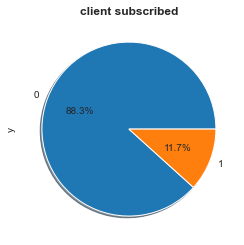

In [27]:
plt.title("client subscribed", size = 12, fontweight = 'bold')
df["y"].replace("No" , 0 , inplace = True)
df["y"].replace("Yes" , 1 , inplace = True)
df["y"].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)
print(df['y'].value_counts())

Based on the graph, we know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%.

### Numerical Features

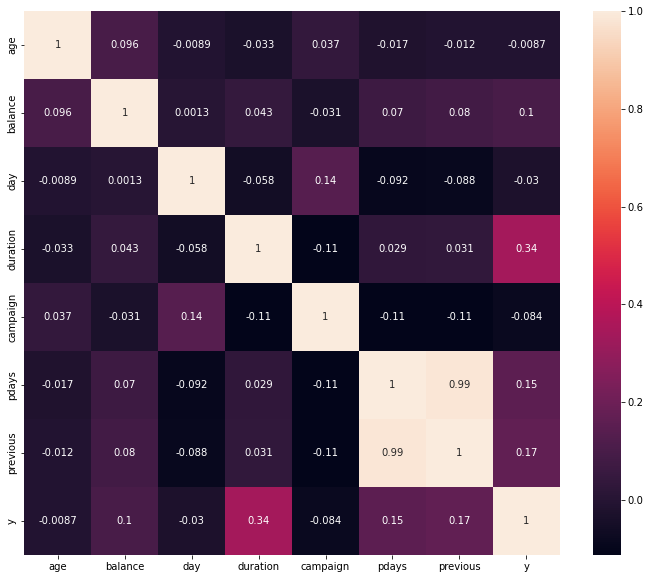

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr("spearman"), annot = True)
plt.show()

Seen in the heatmap which shows the correlation value between variables, that:
- If you look at the correlation relationship based on y with other features, the correlation value is very weak and most of the correlation values between y and other features have a negative relationship.
- One of the two variables that have a very strong relationship is pdays and previous where the correlation value is 0.99.

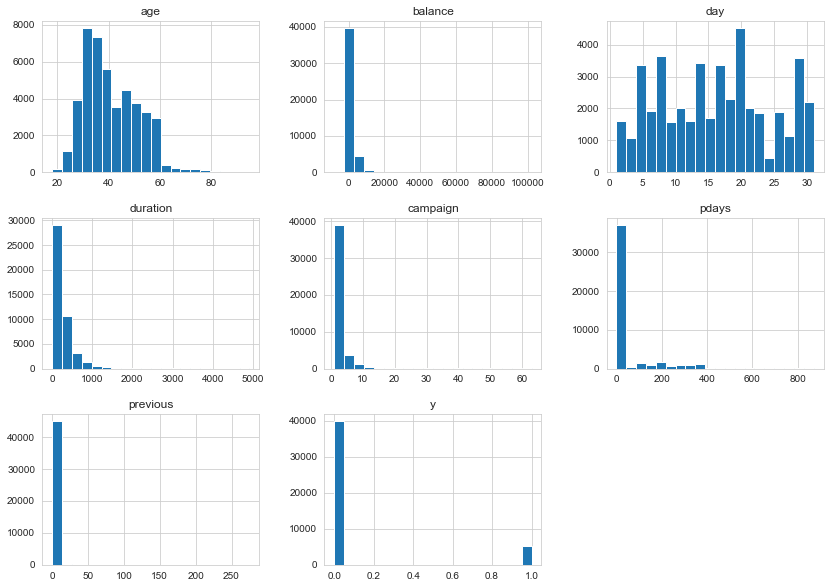

In [17]:
sns.set_style('whitegrid')
df.hist(bins=20, figsize=(14,10))
plt.show()

From the graph above, the following information is obtained:
- The highest number of respondents are between the ages of 30-50 years.
- The balance is concentrated between 0 and 10000, but has a very high value reaching values above 30,000.
- The highest number of contacts with clients occurs on the 5-20th of each month.
- Most call durations occur when the duration is below 600 seconds.
- Most of the data belongs to the initial campaign is 1 to 5.

### Categorical Features

#### Job Features

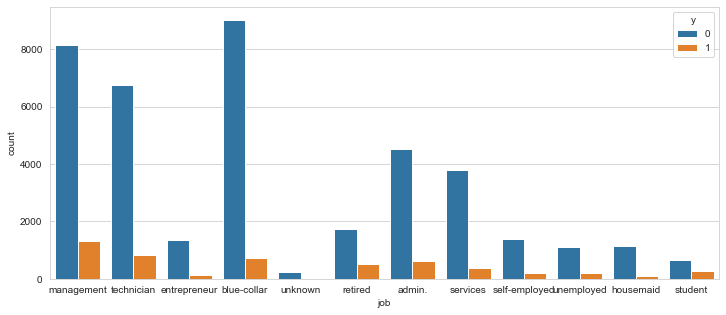

y,0,1,ratio
job,,,
blue-collar,9024,708,0.078457
entrepreneur,1364,123,0.090176
housemaid,1131,109,0.096375
services,3785,369,0.097490
technician,6757,840,0.124316
unknown,254,34,0.133858
self-employed,1392,187,0.134339
admin.,4540,631,0.138987
management,8157,1301,0.159495


In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="job", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.job,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who work as management as many as 1301 and a percentage rate of 15.94% and the clients who subscribe the least are clients who work as house maids as many as 109 and a percentage rate of 9.63%. So it can be assumed that the higher the level of a person's job, it can affect someone to subscribe.

#### Marital Features

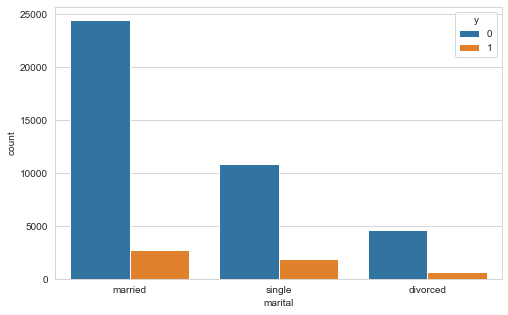

y,0,1,ratio
marital,,,
married,24459,2755,0.112637
divorced,4585,622,0.135660
single,10878,1912,0.175768


In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="marital", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.marital,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with married status as much as 2755 and a percentage rate of 11.26% and clients who subscribe the least, namely clients with divorced status as much as 622 and a percentage rate of 13.56%, so it can be assumed that the more established and mature a person is able to influence someone to subscribe.

#### Education Features

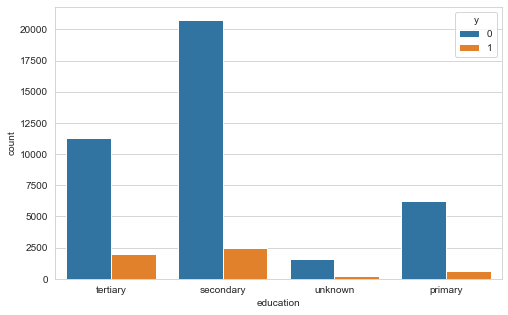

y,0,1,ratio
education,,,
primary,6260,591,0.094409
secondary,20752,2450,0.118061
unknown,1605,252,0.157009
tertiary,11305,1996,0.176559


In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x="education", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.education,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with secondary education qualifications as much as 2450 and a percentage rate of 11.80% and clients who subscribe the least, namely clients with primary education qualifications as many as 591 and a percentage rate of 9.44%, so it can be assumed that the higher the education, the greater the tendency of a person to subscribe.

#### Default Features

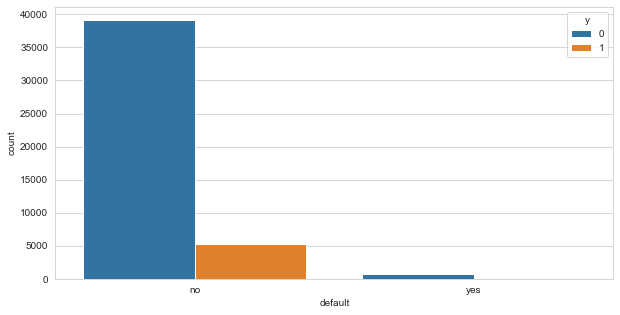

y,0,1,ratio
default,,,
yes,763,52,0.068152
no,39159,5237,0.133737


In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="default", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.default,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The majority of clients who subscribe the most are clients who haven't a credit in default as many as 5237 and a percentage rate of 13.37%

#### Housing Features

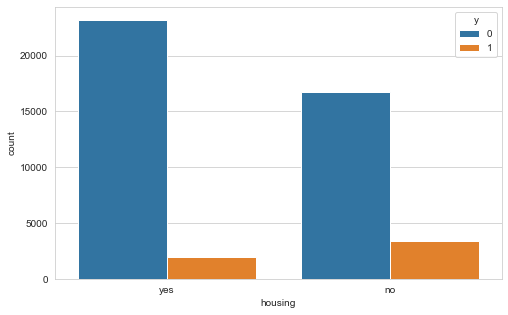

y,0,1,ratio
housing,,,
yes,23195,1935,0.083423
no,16727,3354,0.200514


In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x="housing", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.housing,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who do not own a house as many as 3354 and a percentage rate of 20.05%, so it can be assumed that someone who has a housing loan will find it difficult to subscribe.

#### Loan Features

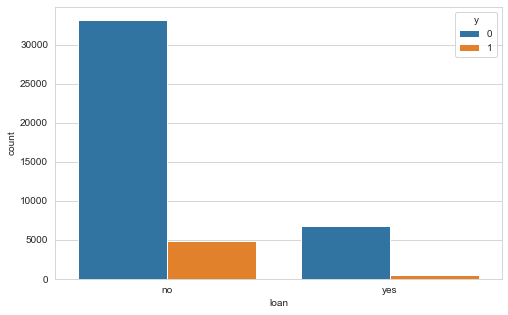

y,0,1,ratio
loan,,,
yes,6760,484,0.071598
no,33162,4805,0.144895


In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="loan", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.loan,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients who do not have personal loans as many as 4805 clients and a percentage rate of 14.48%, so it can be assumed that someone who has a personal loan will find it difficult to subscribe.

#### Contact Features

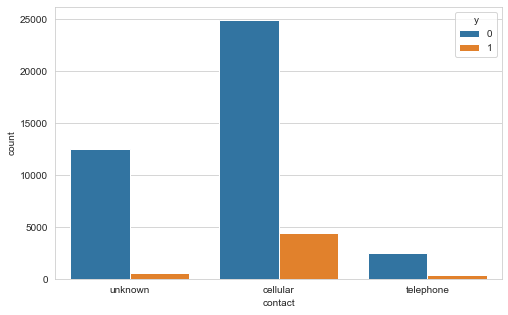

y,0,1,ratio
contact,,,
unknown,12490,530,0.042434
telephone,2516,390,0.155008
cellular,24916,4369,0.175349


In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x="contact", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.contact,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients with cellular contact communication contact types as many as 4369 clients and a percentage rate of 17.53%, so it can be assumed that the more advanced the type of contact, the more likely it is that someone to subscribe.

#### Month Features

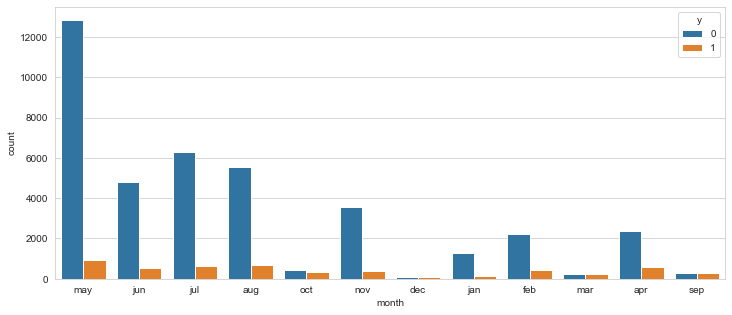

y,0,1,ratio
month,,,
may,12841,925,0.072035
jul,6268,627,0.100032
jan,1261,142,0.112609
nov,3567,403,0.112980
jun,4795,546,0.113869
aug,5559,688,0.123763
feb,2208,441,0.199728
apr,2355,577,0.245011
oct,415,323,0.778313


In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x="month", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.month,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most are clients in May, which is 925, but in May also has the most the highest number of not subscribe, which is 12841, so it cannot be assumed that annual monthly can have a significant effect on someone to subscribe.

#### Poutcome Features

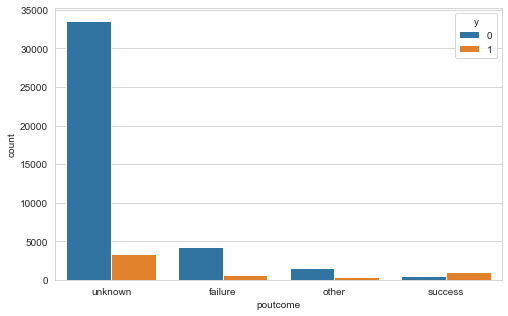

y,0,1,ratio
poutcome,,,
unknown,33573,3386,0.100855
failure,4283,618,0.144291
other,1533,307,0.200261
success,533,978,1.834897


In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x="poutcome", hue= "y", data = df)
plt.show()

new = pd.crosstab(df.poutcome,df.y)
new['ratio']=new[1]/new[0]
new.sort_values(by=['ratio'])

The clients who subscribe the most where marketing campaign were successful as many as 978 clients, so it can be assumed that when the previous marketing campaign was successful, the more likely it is that someone to subscribe.

## Summary

After analyzing exploratory data on bank data, the following conclusions are obtained:
- We know that the number of clients who have subscribed deposits is 5289 with a percentage of 11.7% and the number of clients who do not subscribe deposits is 39922 with a percentage of 88.3%. Then it can be said that credit marketing has not been completely successful because when compared to customers who subscribe and do not subscribe, the comparison is so far.
- Based on numerical features with respect to y, the results obtained that numerical features have a weak relationship with y.
- Numeric features that affect y are **balance, duration, and days**.
- If you look at the distribution of the graphs on the category features, which can be said to have an influence on y are **default, job, loan, and marital.**